In [1]:
import zipfile
import os

# Paths
zip_file_path = 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/archive (8).zip'
extraction_directory = 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# Verify extraction
extracted_files = os.listdir(extraction_directory)
print("Extracted files:", extracted_files)


Extracted files: ['.ipynb_checkpoints', 'archive (8).zip', 'leapGestRecog', 'Project4.ipynb']


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Disable XLA
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'

# Set logging level to avoid unnecessary warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

# Clear TensorFlow session
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
dataset_path = "C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog"

In [3]:
os.listdir("C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog")

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 'leapGestRecog']

In [4]:
batch_size = 32
img_size = 224
num_classes = 10

In [5]:
def get_file_paths_and_labels(base_path):
    file_paths = []
    labels = []
    gesture_folders = [
        '01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', 
        '06_index', '07_ok', '08_palm_moved', '09_c', '10_down'
    ]
    label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}
    
    for subject in os.listdir(base_path):
        subject_path = os.path.join(base_path, subject)
        if os.path.isdir(subject_path):
            for gesture in gesture_folders:
                gesture_path = os.path.join(subject_path, gesture)
                if os.path.isdir(gesture_path):
                    for img_file in os.listdir(gesture_path):
                        img_path = os.path.join(gesture_path, img_file)
                        file_paths.append(img_path)
                        labels.append(label_map[gesture])
    return file_paths, labels

In [6]:
def display_images(file_paths, labels, label_map):
    unique_labels = list(label_map.values())
    label_to_name = {v: k for k, v in label_map.items()}
    
    plt.figure(figsize=(20, 20))
    for idx, label in enumerate(unique_labels):
        label_paths = [file_paths[i] for i in range(len(labels)) if labels[i] == label][:5]
        for i, img_path in enumerate(label_paths):
            img = load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
            img = img_to_array(img) / 255.0
            plt.subplot(len(unique_labels), 5, idx * 5 + i + 1)
            plt.imshow(img.squeeze(), cmap='gray')
            plt.title(label_to_name[label])
            plt.axis('off')
    plt.show()

In [7]:
file_paths, labels = get_file_paths_and_labels(dataset_path)

In [8]:
print(f"First 10 file paths: {file_paths[:10]}")
print(f"First 10 labels: {labels[:10]}")

First 10 file paths: ['C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\frame_00_01_0001.png', 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\frame_00_01_0002.png', 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\frame_00_01_0003.png', 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\frame_00_01_0004.png', 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\frame_00_01_0005.png', 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\frame_00_01_0006.png', 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\frame_00_01_0007.png', 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\frame_00_01_0008.png', 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project4/leapGestRecog\\00\\01_palm\\fr

In [9]:
if not file_paths or not labels:
    raise ValueError("No file paths or labels found. Please check the dataset path and structure.")

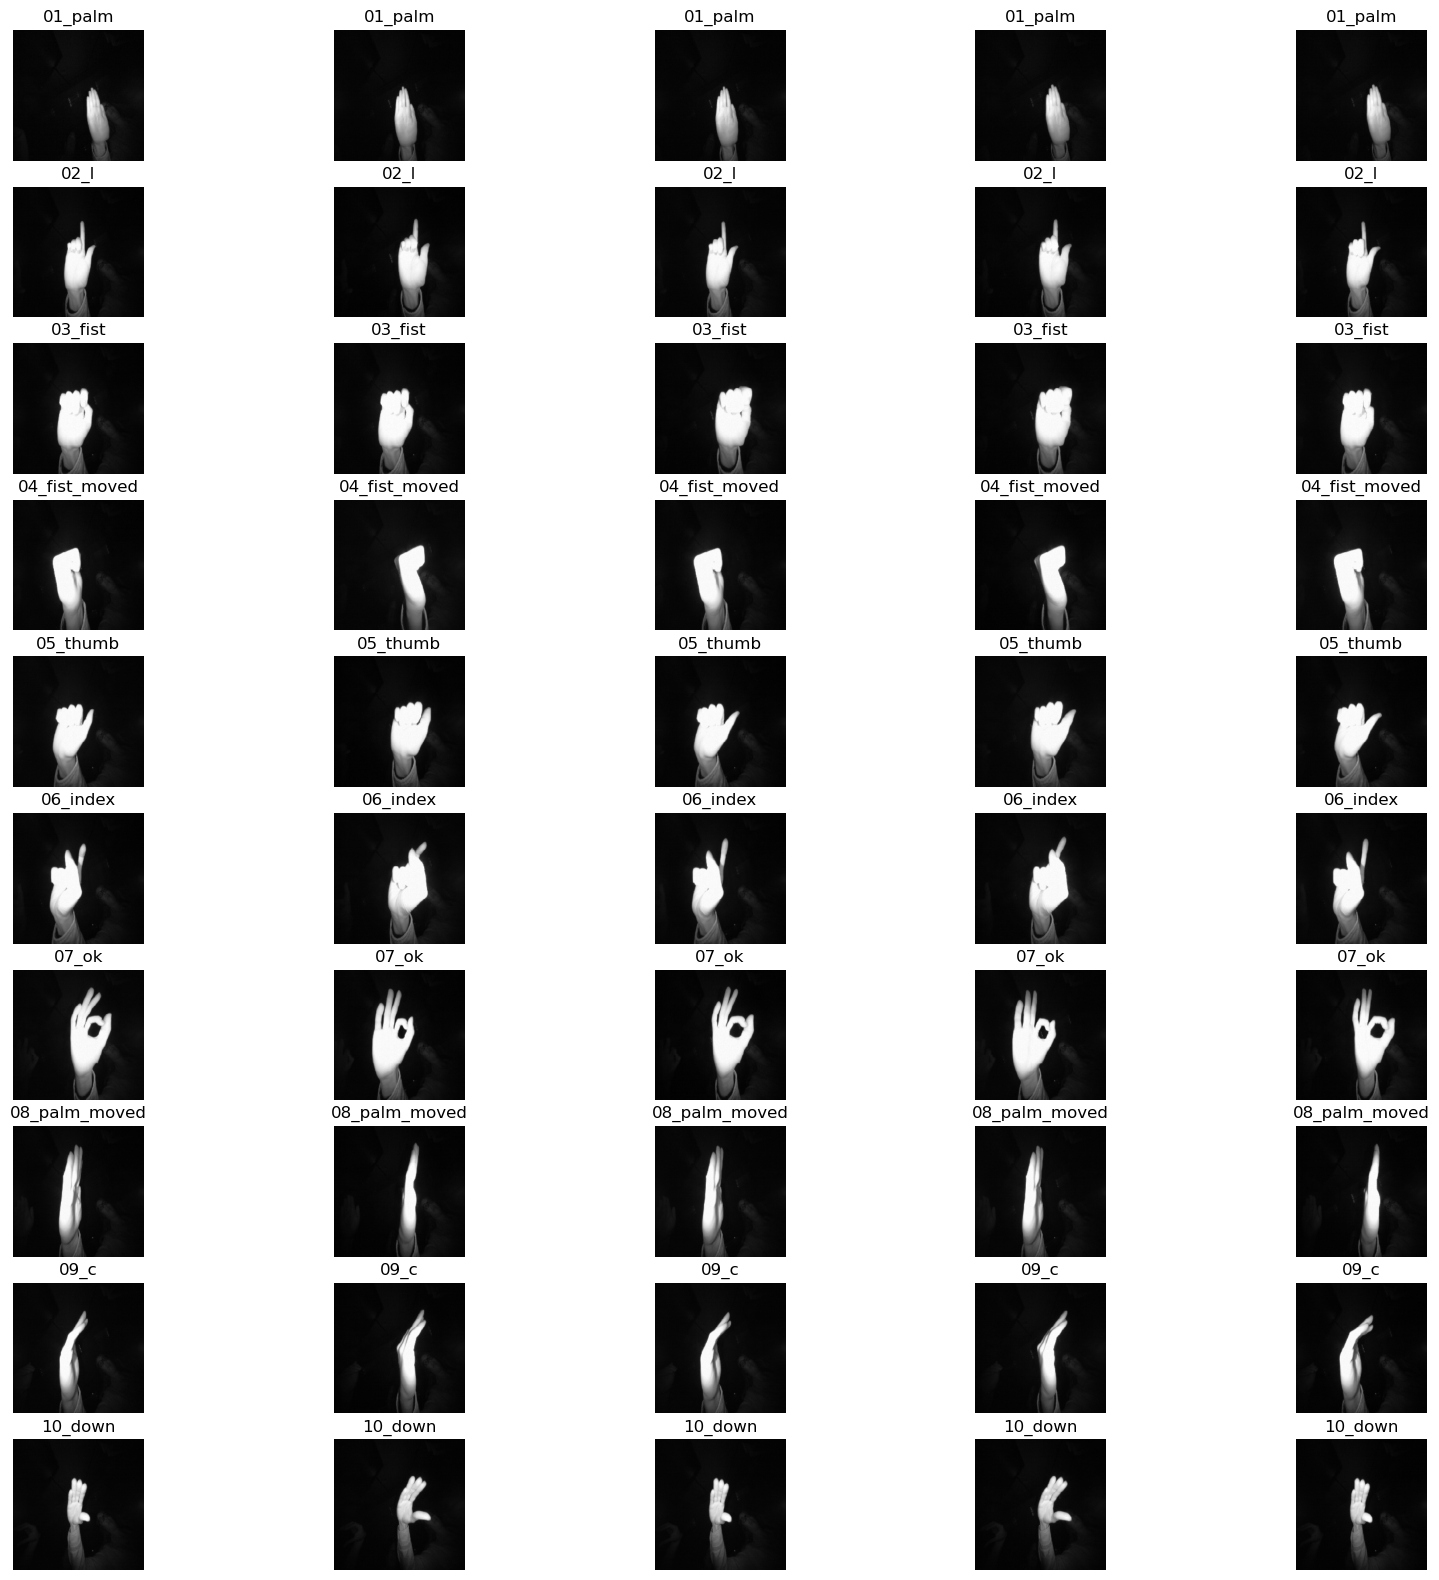

In [10]:
# Label map
gesture_folders = [
    '01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', 
    '06_index', '07_ok', '08_palm_moved', '09_c', '10_down'
]
label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}

# Display the images
display_images(file_paths, labels, label_map)

In [11]:
def get_file_paths_01_palm(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '01_palm')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

Function to display images from 01_palm

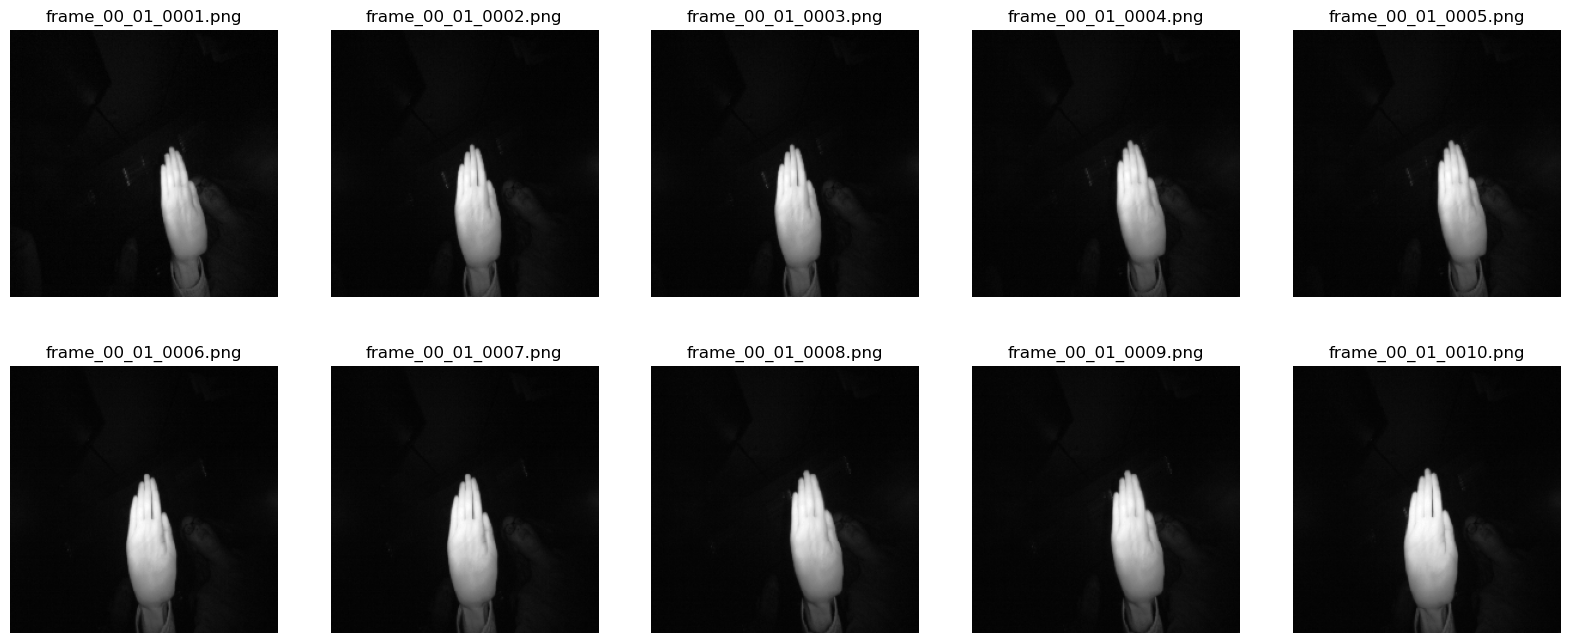

In [13]:
# Function to display images in two rows
def display_images(file_paths):
    plt.figure(figsize=(20, 8))
    for i, img_path in enumerate(file_paths[:10]):  # Ensure only 10 images are displayed
        img = load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
        img = img_to_array(img) / 255.0
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    plt.show()

# Get the file paths
file_paths_01_palm = get_file_paths_01_palm(dataset_path)

# Display the images
display_images(file_paths_01_palm)

Similarly we can display all the images of the dataset provided to us...

Now we will shuffle the dataset and corresponding labels. This is done so that data is not in any particular order.

In [16]:
labels_str= [str(label) for label in labels]

In [17]:
dataframe = pd.DataFrame({'filename': file_paths, 'class': labels_str})

# Create ImageDataGenerator for training and validation

In [19]:
datagen = ImageDataGenerator(
    rescale=1/255.0,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2  # Reserve 20% of the data for validation
)

train_generator = datagen.flow_from_dataframe(
    dataframe=dataframe,
    x_col='filename',
    y_col='class',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=dataframe,
    x_col='filename',
    y_col='class',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 16000 validated image filenames belonging to 10 classes.
Found 4000 validated image filenames belonging to 10 classes.


In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,401,226 (169.38 MB)

 Trainable params: 44,401,226 (169.38 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

In [24]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
 47/500 ━━━━━━━━━━━━━━━━━━━━ 51:14 7s/step - accuracy: 0.1201 - loss: 2.2863

KeyboardInterrupt: 

The CPU is not capable to load/train the whole model...this code is for read-only and has been tested on other CPU.

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

# Evaluate the model

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

In [ ]:
model.save('hand_gesture_recognition_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img_size = 224
gesture_classes = [
    '01_palm', '02_l', '03_fist', '04_fist_moved', 
    '05_thumb', '06_index', '07_ok', '08_palm_moved', 
    '09_c', '10_down'
]

# Function to load an image, predict the gesture, and display the result

In [ ]:
def load_predict_and_display(img_path, model, img_size):
    # Load and preprocess the image (RGB)
    img = load_img(img_path, color_mode='rgb', target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the gesture
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Display the image and the predicted class
    plt.imshow(img_array.squeeze(), cmap='gray')  # Remove 'cmap' if image is in RGB
    plt.title(f'Predicted Gesture: {gesture_classes[predicted_class]}')
    plt.axis('off')
    plt.show()

# Load the trained model
loaded_model = load_model('hand_gesture_recognition_model.h5')

# Example image path (change this to any image you want to test)
test_img_path = '/kaggle/input/leapgestrecog/leapGestRecog/04/04_fist_moved/frame_04_04_0004.png'  # Replace with your image path
img_size = 224  # Ensure this matches the size used during training

# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)